# Conteúdos

## Técnicas e Algoritmos
* Partitional (K-means)
* Hierarchical (Hierarchical Agglomerative Clustering)
* Density (DBScan)
* Self-organizing (SOM)

## Métricas de Avaliação
* V-Measure Score (Homogeneity and Completeness)
* Silhouette Score
* Adjusted Rand Index (ARI)

## Introdução

Análise de agrupamento, ou clustering, é o nome dado para o grupo de técnicas computacionais cujo propósito consiste em separar objetos em **grupos**, baseando-se nas características que estes objetos possuem. A ideia básica consiste em colocar em um mesmo grupo objetos que sejam similares de acordo com algum critério pré-determinado.

Comumente, o critério utilizado é uma função de dissimilaridade; a função recebe como entrada dois objetos e retorna a **distância** entre eles. Existe um conjunto de funções de distâncias, as mais populares são: euclidiana, cosseno e correlação para dados numéricos; e manhattan e jaccard para dados categóricos.

Os objetos também podem ter outros nomes, tais como: exemplo, amostra, tuplas e/ou registros. Cada objeto representa uma entrada de dados que pode ser constituída de um vetor de atributos (numérico e/ou categórico).

Os algoritmos de clustering buscam encontrar grupos utilizando algumas técnicas específicas, por exemplo: a técnica particional busca os grupos dividindo as amostras em subgrupos (o conjunto de todas é um único cluster), enquanto a técnica hierárquica busca reunir amostras mais comuns em um grupo (nos algoritmos aglomerativos cada amostra é inicialmente um grupo). Nesta aula estudaremos as principais técnicas (particionais, hierárquico, densidade, e auto-organizáveis) e exemplos de seus respetivos algoritmos (K-means, HAC, DBscan e SOM).

É esperado que para um bom agrupamento os objetos de um grupo sejam próximos (homogêneo) e os grupos formados distantes (isolados). Existem algumas métricas que podem ser utilizadas para avaliar o resultado final do clustering, algumas serão apresentadas nesta aula.

## Dataset

Nesta aula nós iremos utilizar o dataset Iris para demonstrar o funcionamento dos algoritmos.

* Iris dataset (info)
    * 150 samples
    * 3 classes (setosa, veriscolor, virgínica)
    * https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :]
y = iris.target

### Visualização dos dados

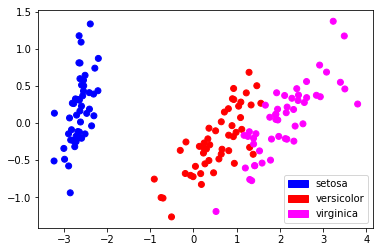

In [5]:
label_name = iris.target_names

from sklearn.decomposition import PCA
data = PCA(n_components=2).fit_transform(X)

color_label = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'magenta'}
y_label = [label_name[x] for x in y]
label_color = [color_label[x] for x in y_label]

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.scatter(data[:, 0], data[:, 1], c=label_color)
team_patches = [mpatches.Patch(color=color, label=team) for team, color in color_label.items()]
plt.legend(handles=team_patches)

## K-means

* O algoritmo K-means é um método de clustering que tem por objetivo particionar n objetos em k grupos;
* Cada objeto pertence a um grupo. A atribuição de um ponto para um grupo pode ser dada por medidas de si/dissimilaridade (e.g. distância euclidiana), que busca calcular a distância entre um objeto e o centróide de cada grupo;
* Esse algoritmo requer um número k de clusters;
* Inicialmente é selecionado k objetos aleatórios como centróides de cada grupo;
* O algoritmo calcula a distância de cada objeto com todos os centróides, ao final dessa iteração os centróides de cada grupo serão recalculados;
* O novo centróide do grupo será calculado com base na média de todos os objetos atribuídos a ele;
* Esse processo é iterativo e converge quando nenhum ponto mudar de cluster.

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans.fit(X)
y_pred = kmeans.labels_

print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


#### Visualizando resultados do agrupamento (K-means)

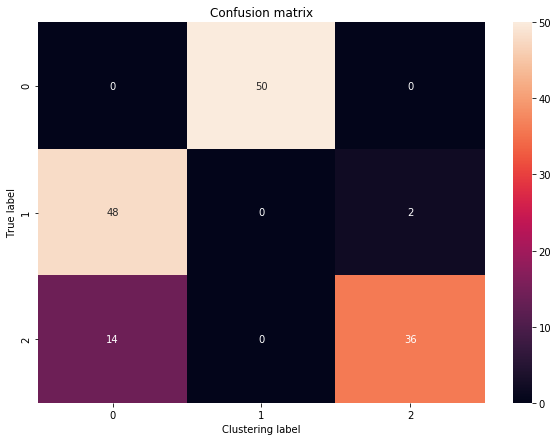

In [5]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()

## Visualizando os centróides de cada grupo

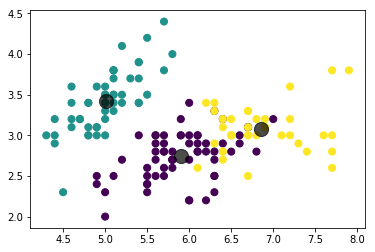

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

http://www.fsma.edu.br/si/edicao4/FSMA_SI_2009_2_Tutorial.pdf
http://www.lbd.dcc.ufmg.br/colecoes/enia/2005/061.pdf

## Hierarchical Agglomerative Clustering

* Duas abordagens podem ser derivadas do clustering hierarquico: **top-down(divisivo) e bottom-up (aglomerativo)**. Nesta aula veremos o aglomerativo;
* Na abordagem bottom-up os dados são inicialmente distribuídos de modo que cada exemplo represente um cluster e, entao, esses clusters são recursivamente agrupados considerando alguma medida de similaridade, até que todos os exemplos pertençam a apenas um cluster;
* Para exemplificar, iremos verificar o funcionamento do algoritmo HAC
    * Defina um cluster para cada objeto;
    * Encontre os pares de cluster mais similares, de acordo com uma medida de distância escolhida;
    * Aglomere-os em um cluster maior e recalcule a distância deste cluster para todos os outros objetos;
    * Repita o item 2 e 3 até sobrar um único cluster.
* A grande vantagem do cluster hierárquico é que essa sequência de combinações (ou fusões) podem ser reconstruídas numa árvore, chamada de **dendrograma**. Essa estrutura permite tanto a visualização das amostras mais próximas, como também definir o número 'ideal' de clusters;
* A seguir iremos verificar uma implementação desse algoritmo e voltaremos a discutir dois principais conceitos: métricas de distâncias e dendograma.

In [41]:
from scipy.cluster.hierarchy import ward, fcluster, linkage, dendrogram
from scipy.spatial.distance import pdist
distance = pdist(X, metric='cosine')
Z = ward(distance)

**pdist** - Pairwise distances between observations in n-dimensional space (X, metric='euclidean', *args, **kwargs) - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

**Z** - Gera uma matriz de distância condensada - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html#scipy.cluster.hierarchy.ward

Para gerar a matriz Z é necessário informar o método para calcular a distância entre um cluster e ***u*** e um objeto ***v***. Lista com os métodos disponíveis: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

No exemplo estamos utilizando o método ward (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.ward.html#scipy.cluster.hierarchy.ward)

A matriz representa um dendograma, onde o primeiro e o segundo elemento são os dois clusters aglomerados (fundidos) em cada passo, o terceiro elemento é a distância entre esses clusters, e o quarto elemento é o tamanho do novo cluster. Considere o primeiro elemento da matriz Z

[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00]

In [56]:
X[101], X[142] # os objetos são iguais, portanto a distância entre eles é 0

(array([5.8, 2.7, 5.1, 1.9]), array([5.8, 2.7, 5.1, 1.9]))

O **dendograma** permite que...

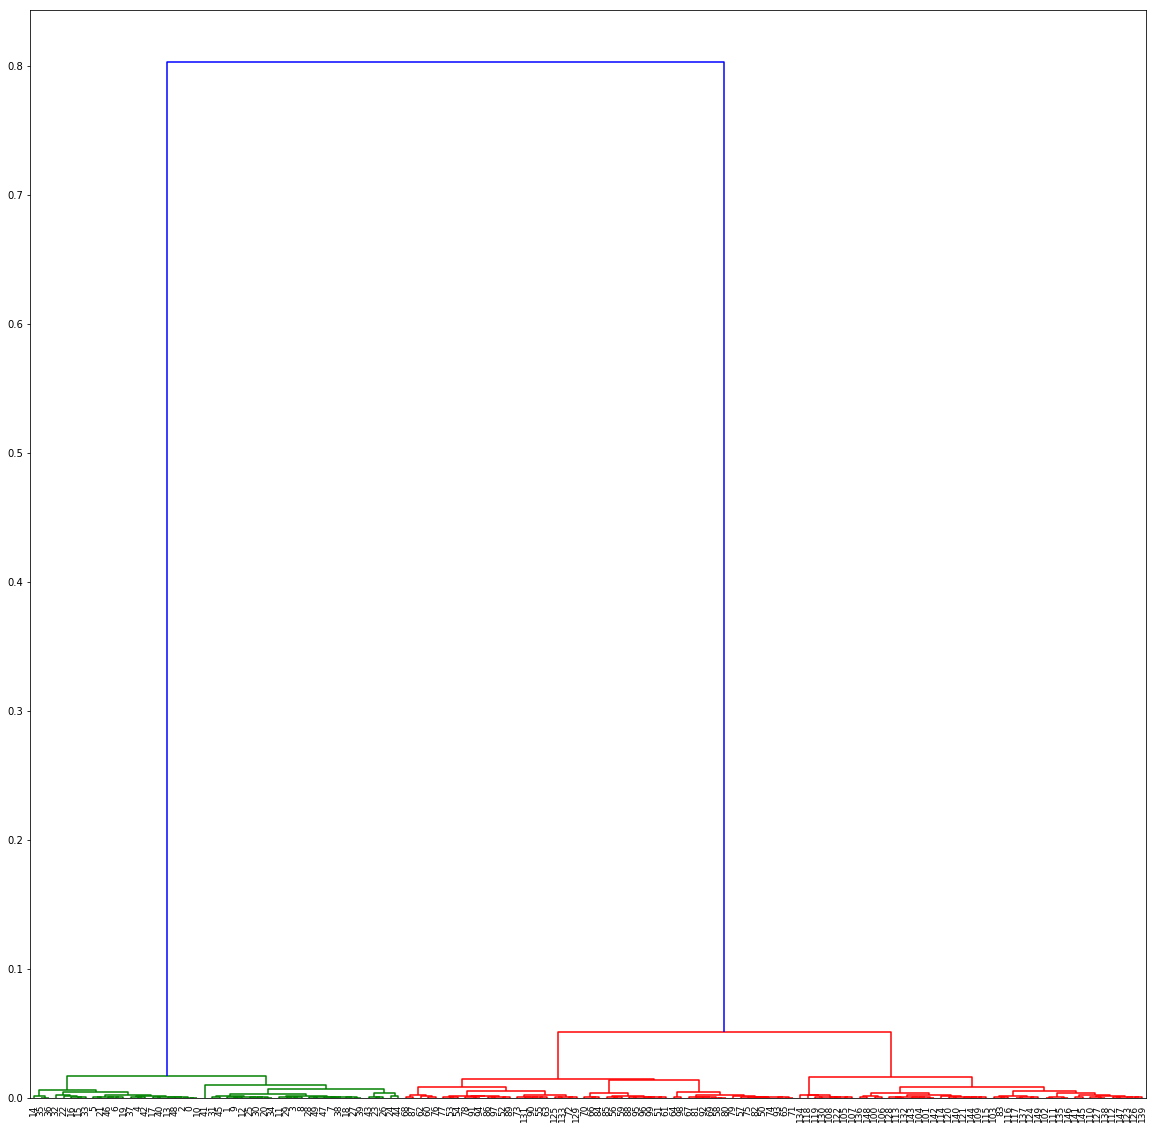

In [42]:
plt.figure(figsize=(20,20))
dn = dendrogram(Z,leaf_font_size=9)

## Utilizando HAC para gerar os clusters

In [48]:
from scipy.cluster.hierarchy import cut_tree
clusters = cut_tree(Z,height=0.05)
clusters.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

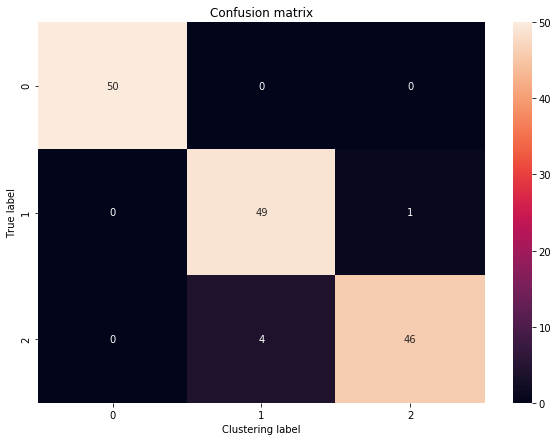

In [50]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, clusters.flatten())

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()